# Explore exoS/exoU modules

This notebook specifically explores the exoS (PAO1) and exoU (PA14) accessory-accessory modules to determine if there is an interesting biological story here.

_P. aeruginosa_ uses a type III secretion system (T3SS) to promote development of severe disease, particularly in patients with impaired immune defenses. _P. aeruginosa_ uses a type III secretion system to inject toxic effector proteins into the cytoplasm of eukaryotic cells. ExoU, ExoS, and ExoT, three effector proteins secreted by this system. ExoU and ExoS are usually secreted by different strains.

What is known about the mechanism by which these genes contribute to virulence?
Heatmaps tell us the structure of the module - if there are any sub-modules.
What can we learn from module composition?
What can we learn from most co-expressed genes?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC529154/

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import utils, paths

np.random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Clustering method
method_name = "affinity"

# Gene subset
gene_subset = "acc"

# Select modules containing exoS (module 16) and exoU (module 17)
exoS_module_id = 16
exoU_module_id = 17

### Load correlation matrix

In [3]:
# Load correlation matrix
pao1_corr_filename = paths.PAO1_CORR_LOG_SPELL_ACC
pa14_corr_filename = paths.PA14_CORR_LOG_SPELL_ACC

In [4]:
pao1_corr = pd.read_csv(pao1_corr_filename, sep="\t", index_col=0, header=0)
pa14_corr = pd.read_csv(pa14_corr_filename, sep="\t", index_col=0, header=0)

### Load module membership

In [5]:
pao1_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pao1_modules_{method_name}_{gene_subset}.tsv"
)
pa14_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_modules_{method_name}_{gene_subset}.tsv"
)

In [6]:
pao1_membership = pd.read_csv(pao1_membership_filename, sep="\t", header=0, index_col=0)
pa14_membership = pd.read_csv(pa14_membership_filename, sep="\t", header=0, index_col=0)

### Select genes associated with modules of interest

In [7]:
exoS_module_df = pao1_membership[pao1_membership["module id"] == exoS_module_id]
exoU_module_df = pa14_membership[pa14_membership["module id"] == exoU_module_id]

In [8]:
exoS_module_df.head()

,module id
PA3362,16
PA2192,16
PA3066,16
PA0257,16
PA4802,16


In [9]:
exoU_module_df.head()

,module id
PA14_28460,17
PA14_51950,17
PA14_49990,17
PA14_28870,17
PA14_28850,17


### Get most co-expressed accessory genes

Make dataframe with all accessory genes sorted by their correlation score relative to exoS or exoU

In [10]:
# Get gene id for exoS and exoU
exoS_id = "PA3841"
exoU_id = "PA14_51530"

In [11]:
# Get correlation scores
exoS_corr_all = pao1_corr.loc[exoS_id].to_frame("corr_score")
exoU_corr_all = pa14_corr.loc[exoU_id].to_frame("corr_score")

In [12]:
exoS_corr_all.head()

,corr_score
PA3500,-0.084097
PA1384,-0.051474
PA2100,0.052347
PA2336,-0.015725
PA2230,-0.030183


In [13]:
exoU_corr_all.head()

,corr_score
PA14_30900,-0.021737
PA14_59845,0.005034
PA14_10300,0.090491
PA14_60020,0.139305
PA14_35730,-0.071012


In [14]:
# Import gene metadata
pao1_gene_annot_filename = paths.GENE_PAO1_ANNOT
pa14_gene_annot_filename = paths.GENE_PA14_ANNOT

pao1_gene_annot = pd.read_csv(pao1_gene_annot_filename, index_col=0, header=0)
pa14_gene_annot = pd.read_csv(pa14_gene_annot_filename, index_col=0, header=0)

In [15]:
# Get df with gene ids as indices and gene names as a column
# Having the data in a df instead of a series will just allow me to do my merges that are in the notebook
pao1_gene_annot = pao1_gene_annot["Name"].to_frame("gene name")
pa14_gene_annot = pa14_gene_annot["Name"].to_frame("gene name")

In [16]:
# Make dataframe with gene id, correlation score, gene name
# Add gene names
exoS_corr_df = exoS_corr_all.merge(
    pao1_gene_annot, left_index=True, right_index=True, how="left"
)
exoU_corr_df = exoU_corr_all.merge(
    pa14_gene_annot, left_index=True, right_index=True, how="left"
)

In [17]:
print(exoS_corr_df.shape)
exoS_corr_df.head()

(202, 2)


,corr_score,gene name
PA3500,-0.084097,NaN
PA1384,-0.051474,galE
PA2100,0.052347,NaN
PA2336,-0.015725,NaN
PA2230,-0.030183,NaN


In [18]:
print(exoU_corr_df.shape)
exoU_corr_df.head()

(534, 2)


,corr_score,gene name
PA14_30900,-0.021737,NaN
PA14_59845,0.005034,NaN
PA14_10300,0.090491,NaN
PA14_60020,0.139305,NaN
PA14_35730,-0.071012,NaN


In [19]:
# Save
exoS_corr_df.to_csv("exoS_corr.tsv", sep="\t")
exoU_corr_df.to_csv("exoU_corr.tsv", sep="\t")

### Heatmap

In [20]:
exoS_module_gene_ids = list(exoS_module_df.index)
exoU_module_gene_ids = list(exoU_module_df.index)

In [21]:
exoS_corr = pao1_corr.loc[exoS_module_gene_ids, exoS_module_gene_ids]
exoU_corr = pa14_corr.loc[exoU_module_gene_ids, exoU_module_gene_ids]

CPU times: user 388 ms, sys: 151 ms, total: 539 ms
Wall time: 203 ms


Text(0.5, 1.05, 'Correlation of exoS module')

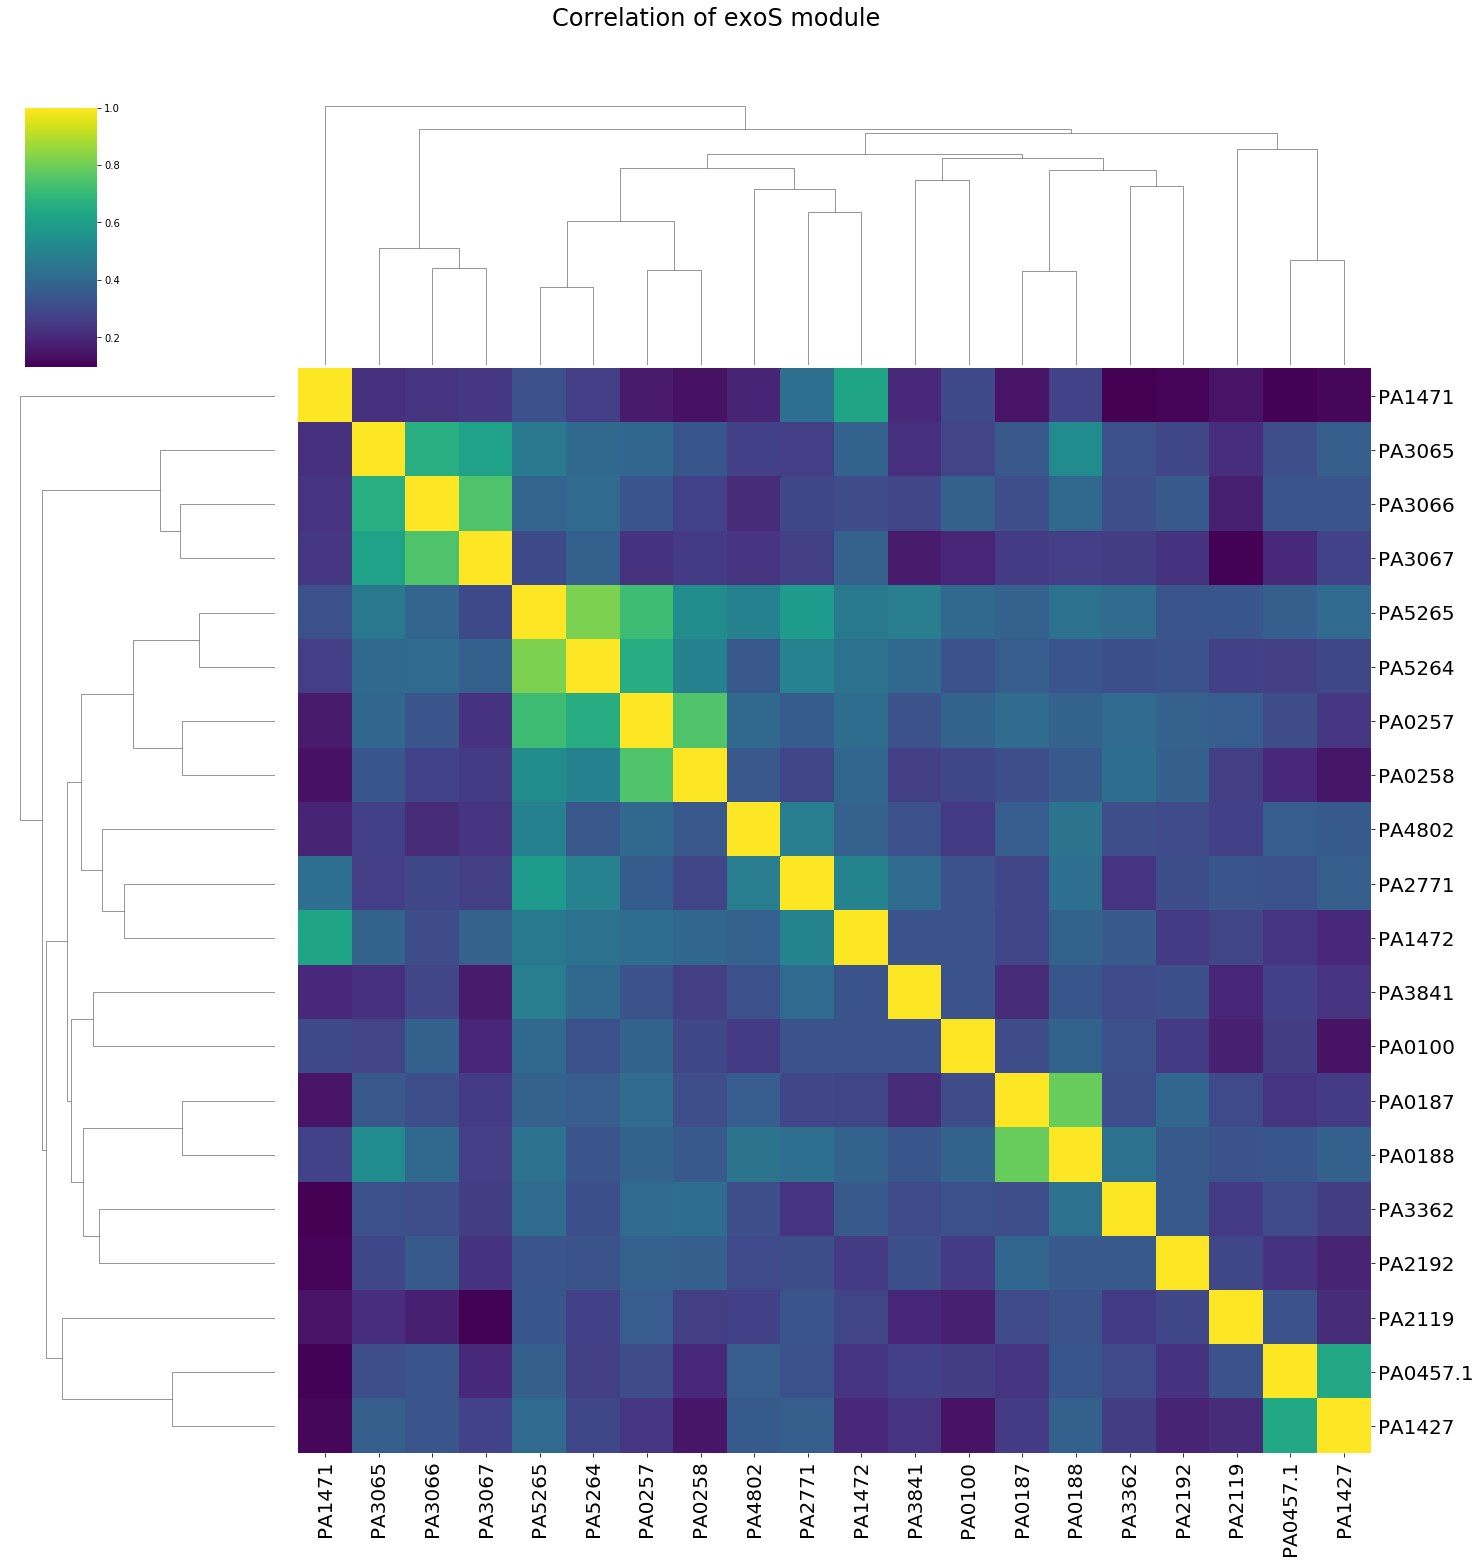

In [26]:
%%time
f = sns.clustermap(exoS_corr.abs(), cmap="viridis", figsize=(20, 20))
f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize=20)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize=20)
f.fig.suptitle("Correlation of exoS module", y=1.05, fontsize=24)

CPU times: user 396 ms, sys: 135 ms, total: 531 ms
Wall time: 200 ms


Text(0.5, 1.05, 'Correlation of exoU module')

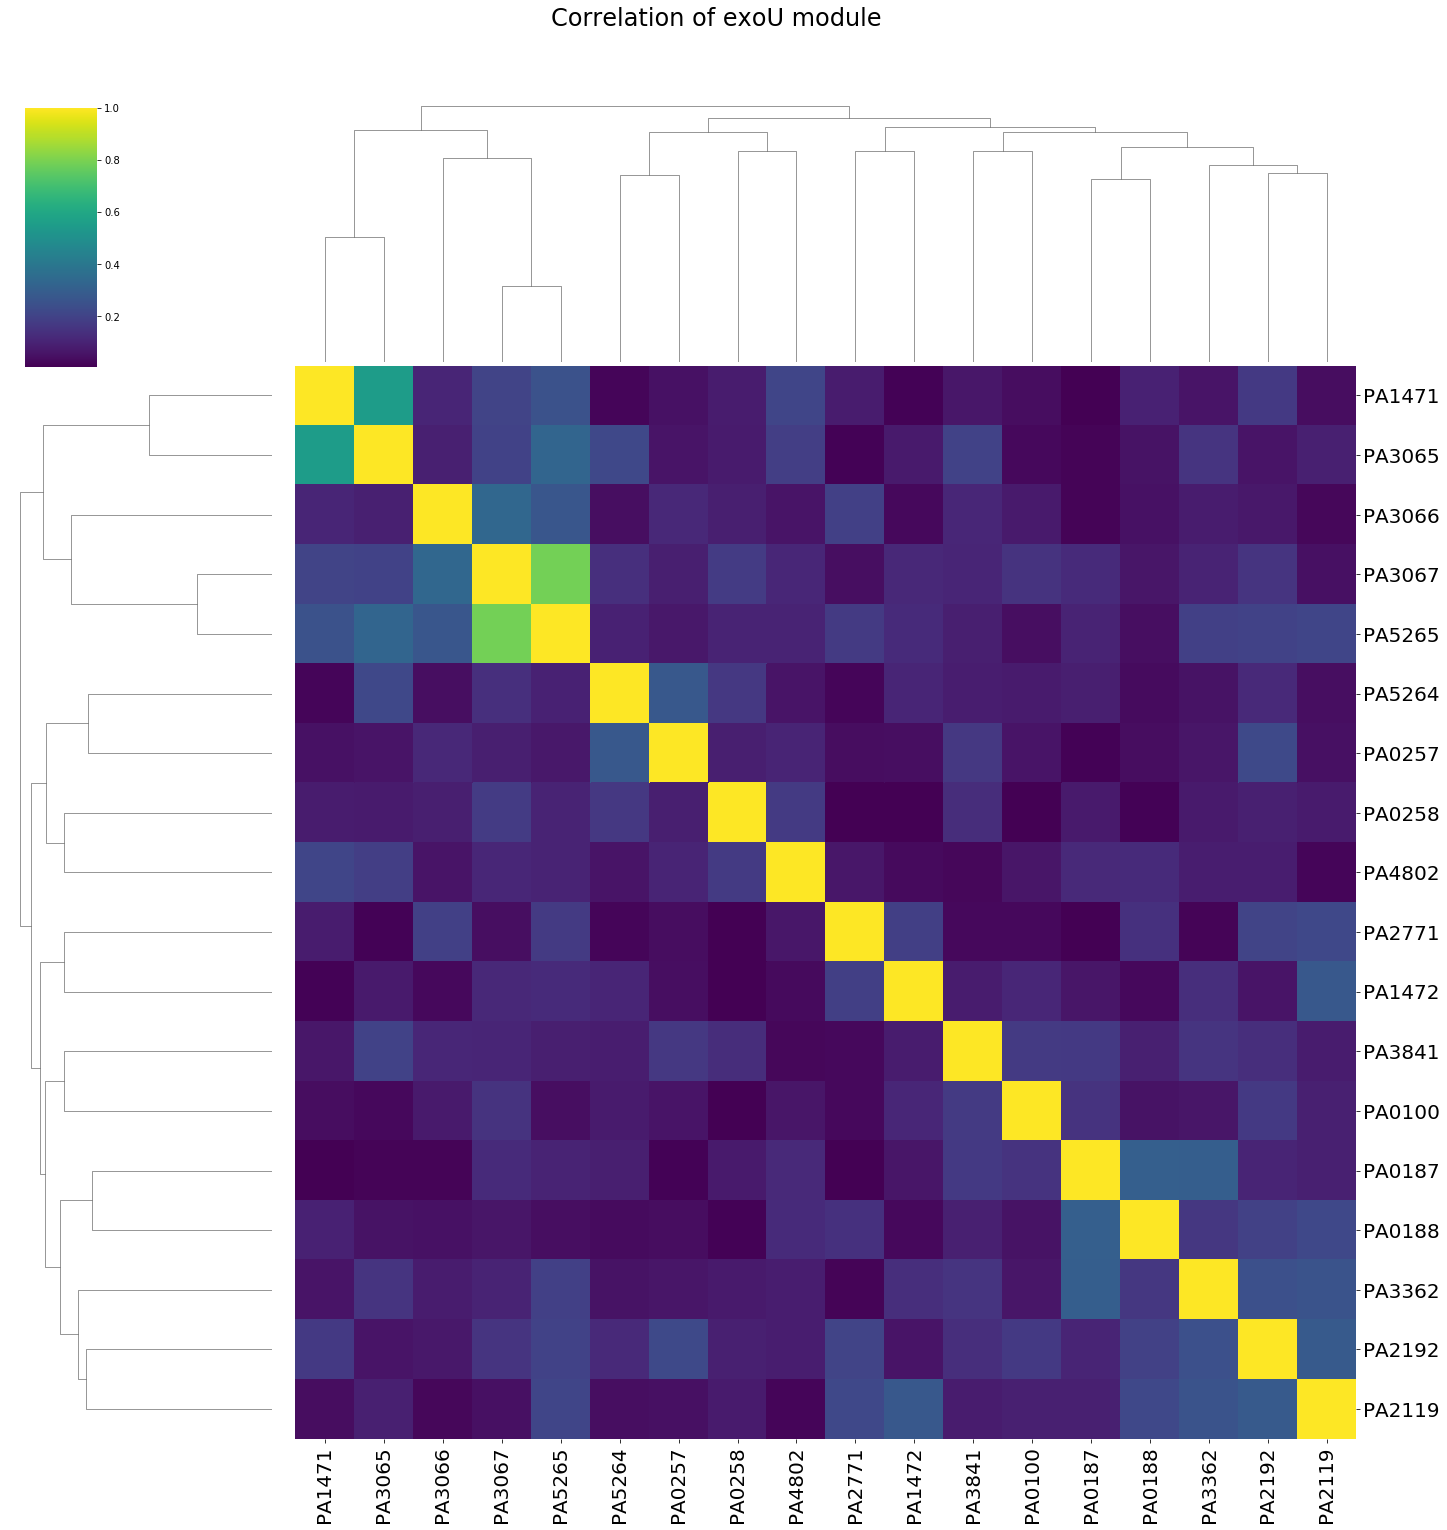

In [27]:
%%time
g = sns.clustermap(exoU_corr.abs(), cmap="viridis", figsize=(20, 20))
g.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize=20)
g.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize=20)
g.fig.suptitle("Correlation of exoU module", y=1.05, fontsize=24)